In [1]:
#From SAV to LOVE

# HW3


__1.__ Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
def calc_logloss(y, y_pred):
# при использовании сигмоиды  теоретически не может оказаться значения в y_pred значений равных 0 или 1 
    eps = 1e-7
    y_pred[y_pred ==0] = eps
    y_pred[y_pred ==1] = 1 - eps

    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [8]:
y = np.array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])
y_pred = np.array([0.1, 0.7, 0.85, 0, 1., 0.67, 0.15, 0.25, 0.6, 0.4])
calc_logloss(y, y_pred)

2.1602343980014793

-----
__2.__Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.


In [9]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [10]:
def std_feat(X):
    X_st = X.copy()
    for i in range(1,X.shape[0]):
        X_st[i, :] = (X_st[i, :] - X_st[i, :].mean())/X_st[i, :].std()
    return X_st

In [11]:
X_st = std_feat(X)
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [12]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errs = []
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        errs.append(calc_logloss(y, y_pred))
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
        print(i, W, errs[-2:])
    return W

In [13]:
W = eval_model(X_st, y, iterations=1000, alpha=410)

1000 [ 145.0342788  -313.55463095 -433.6823138   873.17102269] [3.478551142892576e-06, 3.473347272444196e-06]


In [15]:
# Произведем вычисление зависимости количествоа итераций для сходимости по logloss в зависимости от выбираемого шага 
X1 = X_st.copy()
steps = [0.1, 1, 10 ,100, 200, 300,400,410,500, 600, 700 ]
N =[]
ss = []
eps = 1e-5 # определим точность сдля определения сходимости 
iterations = 10000 
np.random.seed(42)
W = np.random.randn(X1.shape[0])
n = X1.shape[1]
for alpha in steps:
    W = np.random.randn(X1.shape[0])
    errs = []
    for i in range(1, iterations+1):
        z = np.dot(W, X1)
        y_pred = sigmoid(z)
        errs.append(calc_logloss(y, y_pred))
        W -= alpha * (1/n * np.dot((y_pred - y), X1.T))
        if (i > 100) and (abs(errs[-100]-errs[-1]) < eps):
            N.append(i)
            ss.append(alpha)
            break
        elif i == iterations:
            N.append(i)
            ss.append(alpha)
            break
    print(i, alpha, round(errs[-1]-errs[-50],12) , errs[-1])

10000 0.1 -0.00030999857 0.17982282336947347
10000 1 -0.000142886631 0.07773202597709114
10000 10 -8.1597477e-05 0.018809137625735647
1997 100 -4.137409e-06 2.638735805269096e-05
680 200 -4.823604e-06 0.0005715334302861754
197 300 -2.96992e-07 9.31917491016752e-06
269 400 -3.139803e-06 9.095656340140782e-06
218 410 -2.450149e-06 7.378996504398123e-06
206 500 -7.33069e-07 2.7651669771198545e-06
402 600 -2.335559e-06 5.428449434778407e-06
193 700 -1.935525e-06 3.309402781568888e-06


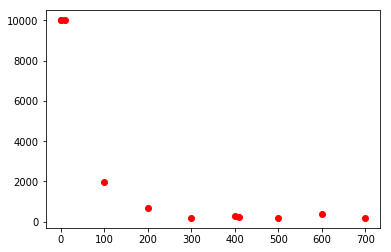

In [17]:
# зависимость количества итераций от шагов
plt.scatter(ss,N, color='r') 

Как вдно оптимальный вариант alpha для дальнейших операций  400

------
__3.__ Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).


In [18]:
# Обучим модель
W = eval_model(X_st, y, iterations=1000, alpha=400)

1000 [  59.86065924 -370.5462261  -210.42645761  546.36012062] [1.4425785675164577e-05, 1.4420243885472945e-05]


In [19]:
def calc_pred_proba(W,X):
    return sigmoid(np.dot(W, X))

In [20]:
calc_pred_proba(W,X_st)

array([6.48010076e-006, 1.31277510e-043, 1.00000000e+000, 9.22332373e-025,
       9.99976456e-001, 5.56038975e-005, 1.00000000e+000, 2.90573094e-198,
       9.99941784e-001, 1.00000000e+000])

----
__4.__Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).


In [21]:
def calc_pred(W,X,p = 0.5):
    y = sigmoid(np.dot(W, X))
    for i in range(len(y)):
        if y[i] >= p:
            y[i] = 1
        else:
            y[i] = 0
    return y

In [22]:
y_pred = calc_pred(W,X_st)
y_pred, y

(array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]),
 array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]))

----
__5.__Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.


In [24]:
def err_matrix(y,y_pred):
    df = pd.DataFrame({
    "Y_true": y,
    "Y_pred": y_pred
    })
    M = np.zeros([2,2])
    for i in range(2):
        for j in range(2):
            M[i,j] = df[(df['Y_true']==1-j) &(df['Y_pred'] ==1-i)].count()[0]
    return(M)

In [25]:
# Проверим их
y1 = np.array([1., 1., 1., 0., 1., 0., 0., 0., 1., 1.])
print(y)
print(y1)
print(err_matrix(y,y1))

[0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
[1. 1. 1. 0. 1. 0. 0. 0. 1. 1.]
[[4. 2.]
 [1. 3.]]


In [26]:
# Вычислим матрицу ошибки по примеру
M = err_matrix(y,y_pred)
M

array([[5., 0.],
       [0., 5.]])

In [27]:
Precision = M[0,0]/(M[0,0]+M[0,1])
Recall = M[0,0]/(M[0,0]+M[1,0])
print(f'Accuracy = {(M[0,0]+M[1,1])/M.sum()}')
print(f'Error matrix = \n{M}')
print(f'Precision = {Precision}')
print(f'Recall = {Recall}')
print(f'F1 Score = {2*Precision*Recall/(Precision+Recall)}')

Accuracy = 1.0
Error matrix = 
[[5. 0.]
 [0. 5.]]
Precision = 1.0
Recall = 1.0
F1 Score = 1.0


----
__6.__Могла ли модель переобучиться? Почему? 

Да, т.к. мы проводим обучение на тренировочных данных, и соотвесвенно у нас получается точное обучение для существующтих данных, что на другом массиве может оказать что выборка не соответсвует той выборке на которой мы проводим обучение. За счет этого и получается эффект переобучения.

----
__7*.__ Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [28]:
def eval_model_l2(X, y, iterations, alpha= 1, lambda_ = 1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errs = []
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        errs.append(calc_logloss(y, y_pred))
        W -= alpha * (1/n * np.dot((y_pred - y), X.T)-2*lambda_*W)
    if i % (iterations / 10) == 0:
        print(i, W, errs[-2:])
    return W

In [29]:
# Попробуем обучить систему со следующими парметрами
W =eval_model_l2(X_st, y, iterations=1000, alpha=0.01 , lambda_ = 1e-1)

1000 [ 1.59650098 -6.50673327 -0.56062723  8.74480686] [0.3233688580203328, 0.3234447150009953]


In [30]:
# результат схож но немного другой
y_pred_l2 = calc_pred(W,X_st)
y_pred_l2, y_pred

(array([0., 0., 1., 0., 1., 1., 1., 0., 0., 1.]),
 array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]))

In [31]:
calc_pred_proba(W,X_st)

array([0.12198286, 0.09930049, 0.99865486, 0.11013103, 0.97001913,
       0.50079857, 0.99995312, 0.09714152, 0.12831089, 0.99820485])

In [32]:
def eval_model_l1(X, y, iterations, alpha= 7, lambda_ = 1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    errs = []
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        errs.append(calc_logloss(y, y_pred))
        W -= alpha * (1/n * np.dot((y_pred - y), X.T)-lambda_*np.sign(W))
    if i % (iterations / 10) == 0:
        print(i, W, errs[-2:])
    return W

In [33]:
W = eval_model_l1(X_st, y, iterations=1000, alpha=0.01,lambda_ = 1e-1)

1000 [ 0.59643005 -2.28963431  0.56335132  2.43164934] [0.4377929565308422, 0.4377254820920764]


In [34]:
y_pred_l1 = calc_pred(W,X_st)
y_pred_l1, y_pred

(array([0., 0., 1., 0., 1., 1., 1., 0., 0., 1.]),
 array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]))

In [35]:
calc_pred_proba(W,X_st)

array([0.30439703, 0.35569766, 0.85317011, 0.32953994, 0.85260935,
       0.5841466 , 0.96412774, 0.4460916 , 0.29223869, 0.88596108])